<a href="https://colab.research.google.com/github/SainzayaBaasankhuu/Data-Science-Projects/blob/main/NLP%E2%80%94%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

この記事を使うことに決めた理由は、トランプがプーチンのウクライナの一部地域を独立と宣言する決定を「天才的」とか「非常に賢い」と言ったような皮肉が含まれているからです。私は、ポジティブな言葉がネガティブな意味で使われている表現方法が、機械にとってテキストを正しい分類に分けるのが難しいだろうと考えました。

---

I decided to use this article because it has sarcasms such as “Trump said Putin’s decision to
declare certain breakaway regions in Ukraine as independent to be “genius” and “very savvy.” I
thought the expressions and way positive words are meant negatively would be challenging for
the machines to classify texts to correct classification.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


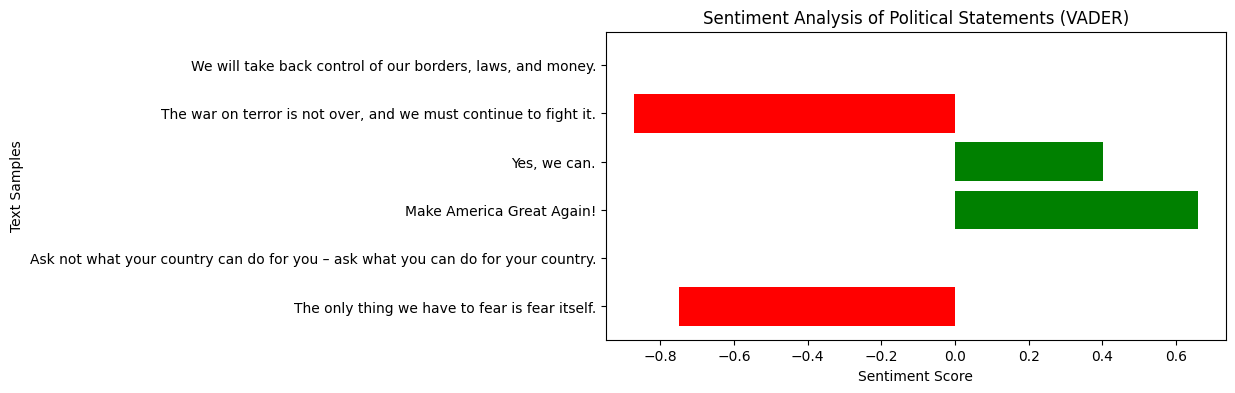

Text: The only thing we have to fear is fear itself.
Sentiment Score: -0.7506

Text: Ask not what your country can do for you – ask what you can do for your country.
Sentiment Score: 0.0

Text: Make America Great Again!
Sentiment Score: 0.6588

Text: Yes, we can.
Sentiment Score: 0.4019

Text: The war on terror is not over, and we must continue to fight it.
Sentiment Score: -0.872

Text: We will take back control of our borders, laws, and money.
Sentiment Score: 0.0



In [ ]:
#VADER Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

texts = [
    "The only thing we have to fear is fear itself.",
    "Ask not what your country can do for you – ask what you can do for your country.",
    "Make America Great Again!",
    "Yes, we can.",
    "The war on terror is not over, and we must continue to fight it.",
    "We will take back control of our borders, laws, and money."
]

sentiments = [sia.polarity_scores(text)['compound'] for text in texts]

plt.figure(figsize=(8,4))
plt.barh(texts, sentiments, color=['red' if s < 0 else 'green' for s in sentiments])
plt.xlabel("Sentiment Score")
plt.ylabel("Text Samples")
plt.title("Sentiment Analysis of Political Statements (VADER)")
plt.show()

for text, sentiment in zip(texts, sentiments):
    print(f"Text: {text}\nSentiment Score: {sentiment}\n")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                           Statement  Sentiment Score  \
0     The only thing we have to fear is fear itself.          -0.7506   
1  Ask not what your country can do for you – ask...           0.0000   
2                          Make America Great Again!           0.6588   
3                                       Yes, we can.           0.4019   
4  The war on terror is not over, and we must con...          -0.8720   
5  We will take back control of our borders, laws...           0.0000   

  Sentiment Category  
0           Negative  
1            Neutral  
2           Positive  
3           Positive  
4           Negative  
5            Neutral  


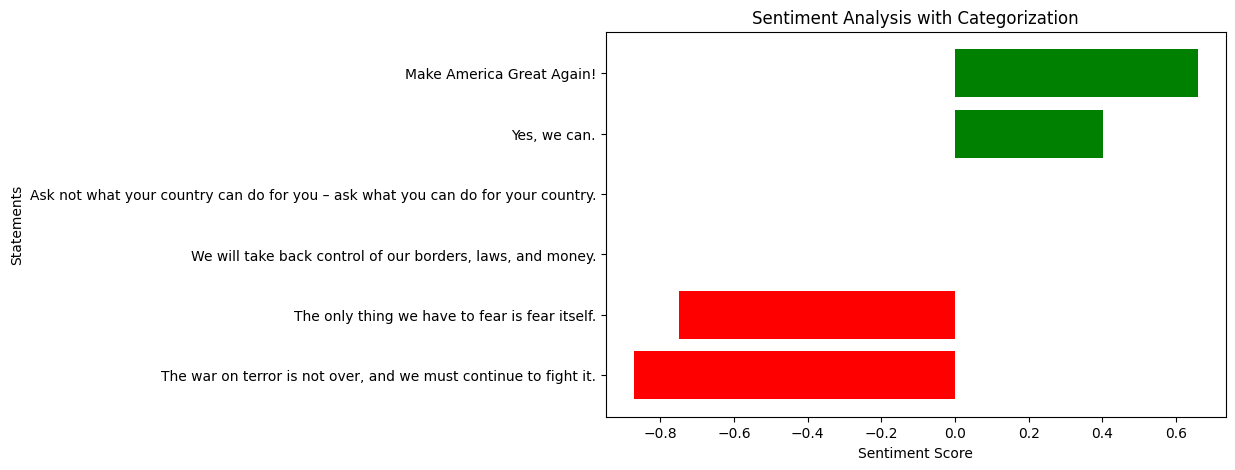

In [ ]:
#VADER with Clear Categorization of Sentiment
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

statements = [
    "The only thing we have to fear is fear itself.",
    "Ask not what your country can do for you – ask what you can do for your country.",
    "Make America Great Again!",
    "Yes, we can.",
    "The war on terror is not over, and we must continue to fight it.",
    "We will take back control of our borders, laws, and money."
]

results = []
for statement in statements:
    sentiment_score = sia.polarity_scores(statement)['compound']
    sentiment_label = "Positive" if sentiment_score >= 0.05 else "Negative" if sentiment_score <= -0.05 else "Neutral"
    results.append([statement, sentiment_score, sentiment_label])

df = pd.DataFrame(results, columns=['Statement', 'Sentiment Score', 'Sentiment Category'])
print(df)

colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
df_sorted = df.sort_values(by='Sentiment Score', ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(df_sorted['Statement'], df_sorted['Sentiment Score'], color=[colors[label] for label in df_sorted['Sentiment Category']])
plt.xlabel('Sentiment Score')
plt.ylabel('Statements')
plt.title('Sentiment Analysis with Categorization')
plt.show()

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 54.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.1 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=ccd6663de20a84004778ff7bd2c010615f5453e8b24ba313b38745b3aa878030
  Stored in directory: /root/.cache/pip/wheels/fc/ab/f8/cce3a9ae6d828bd346be695f7ff54612cd22b7cbd7208d68f3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3341 sha256=700b1bc76653a9be32a12624163d3d9dd9010b7168b30f7eed2fd902f2dc39a9
  Stored in directory: /root/.cache/pip/wheels/80/d5/72/9cd9eccc819636436c6a6e59c22a0fb1ec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Extracted Article Text (Truncated):
“Before I even arrive at the Oval Office, shortly after we all together win the presidency, we will have the horrible war between Russia and Ukraine settled. It will be settled. The war is going to be settled. I’ll get them both. I know Zelensky, I know Putin. It’ll be done within 24 hours, you watch.”

— Donald Trump, remarks at a campaign rally in Erie, Pennsylvania, July 29, 2023

“Russia and Ukraine will immediately start negotiations toward a Ceasefire and, more importantly, an END to the W...

Number of sentences extracted: 118



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Text: “Before I even arrive at the Oval Office, shortly after we all together win the presidency, we will have the horrible war between Russia and Ukraine settled.
Sentiment: NEGATIVE, Confidence: 0.9959

Text: It will be settled.
Sentiment: NEGATIVE, Confidence: 0.5043

Text: The war is going to be settled.
Sentiment: NEGATIVE, Confidence: 0.9875

Text: I’ll get them both.
Sentiment: POSITIVE, Confidence: 0.9997

Text: I know Zelensky, I know Putin.
Sentiment: POSITIVE, Confidence: 0.9944

Text: It’ll be done within 24 hours, you watch.”

— Donald Trump, remarks at a campaign rally in Erie, Pennsylvania, July 29, 2023

“Russia and Ukraine will immediately start negotiations toward a Ceasefire and, more importantly, an END to the War.
Sentiment: POSITIVE, Confidence: 0.9944

Text: The conditions for that will be negotiated between the two parties, as it can only be, because they know details of a negotiation that nobody else would be aware of.”

— President Trump, in a social media pos

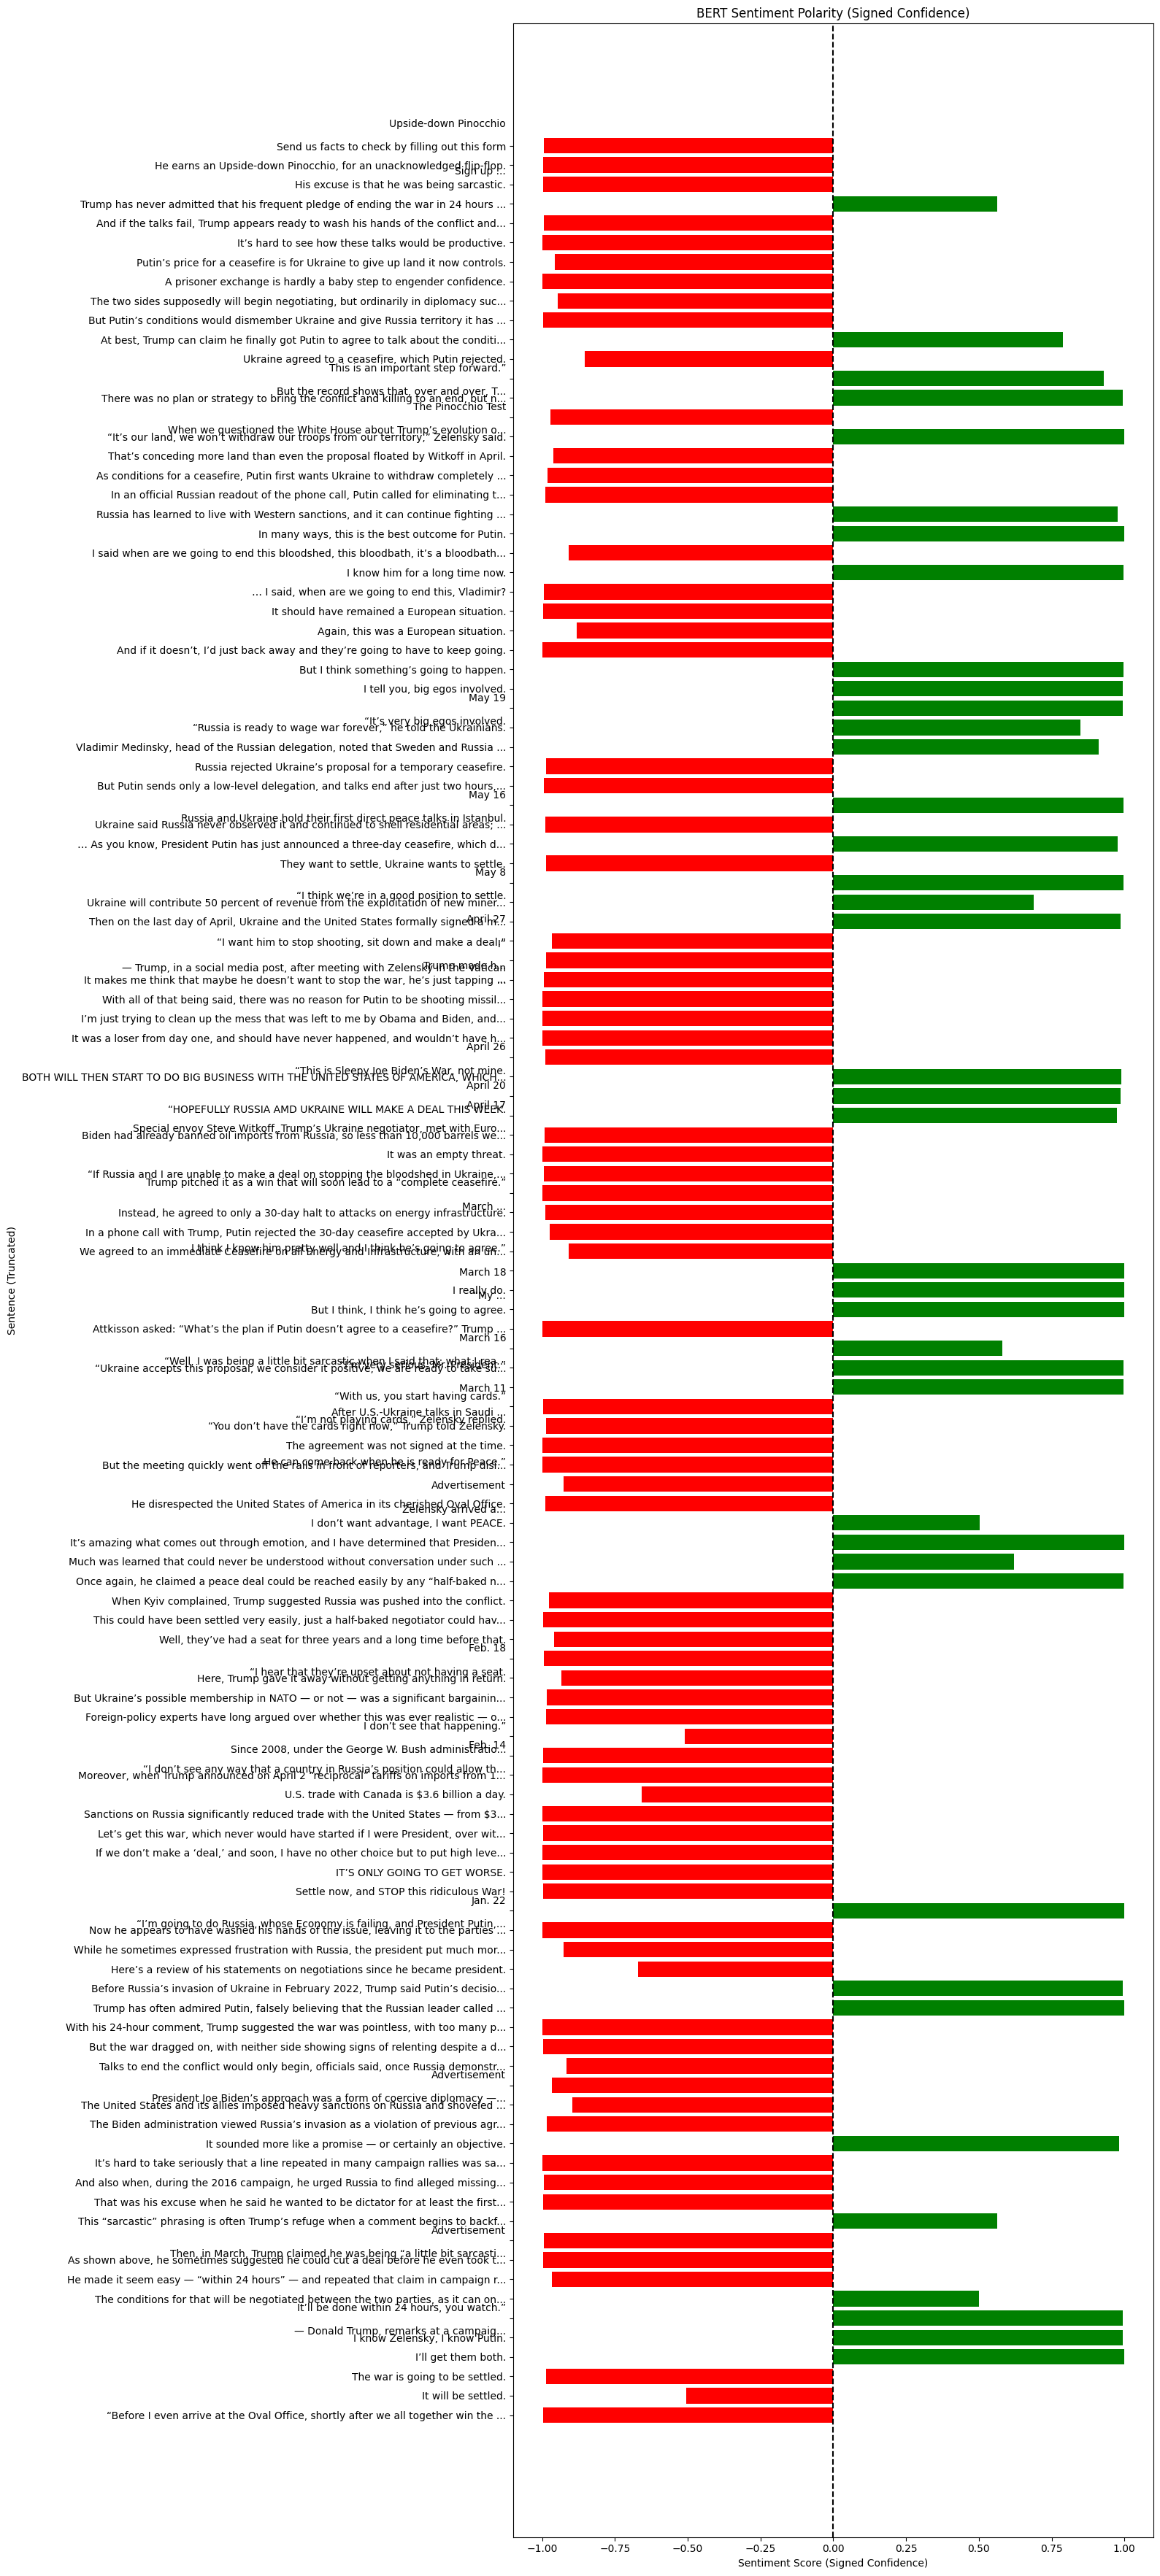

In [ ]:
#BERT
# Install necessary packages
!pip install newspaper3k
!pip install transformers torch
!pip install lxml_html_clean

# Imports
from newspaper import Article
import nltk
from nltk.tokenize import sent_tokenize
from transformers import pipeline
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

# Load and parse article
url = "https://www.washingtonpost.com/politics/2025/05/22/trump-russia-ukraine-24-hours-fact-checker/?utm_source=chatgpt.com"
article = Article(url)
article.download()
article.parse()

# Use full article text
text = article.text
print(f"Extracted Article Text (Truncated):\n{text[:500]}...\n")

# Tokenize into sentences
sentences = sent_tokenize(text)
print(f"Number of sentences extracted: {len(sentences)}\n")

# Run BERT sentiment analysis
sentiment_analyzer = pipeline("sentiment-analysis")
results = sentiment_analyzer(sentences)

# Show results
for sentence, result in zip(sentences, results):
    print(f"Text: {sentence}")
    print(f"Sentiment: {result['label']}, Confidence: {result['score']:.4f}\n")

# Count and compute average confidence
positive_scores = [result['score'] for result in results if result['label'] == 'POSITIVE']
negative_scores = [result['score'] for result in results if result['label'] == 'NEGATIVE']

print(f"\nPositive sentences: {len(positive_scores)}")
print(f"Negative sentences: {len(negative_scores)}")

if len(positive_scores) > len(negative_scores):
    overall_sentiment = "Overall Sentiment: POSITIVE"
    avg_score = sum(positive_scores) / len(positive_scores) if positive_scores else 0
else:
    overall_sentiment = "Overall Sentiment: NEGATIVE"
    avg_score = sum(negative_scores) / len(negative_scores) if negative_scores else 0

print(f"\n{overall_sentiment} (Average Confidence: {avg_score:.4f})")

# Prepare visualization data
labels = [result['label'] for result in results]
scores = [result['score'] for result in results]
colors = ['green' if label == 'POSITIVE' else 'red' for label in labels]

# Adjust polarity
adjusted_scores = [
    score if label == 'POSITIVE' else -score
    for score, label in zip(scores, labels)
]

# Truncate sentence labels to avoid layout issues
short_labels = [s[:80] + "..." if len(s) > 80 else s for s in sentences]

# Plot
plt.figure(figsize=(16, max(5, len(short_labels)*0.3)))
plt.barh(short_labels, adjusted_scores, color=colors)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel("Sentiment Score (Signed Confidence)")
plt.ylabel("Sentence (Truncated)")
plt.title("BERT Sentiment Polarity (Signed Confidence)")
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



=== Sentiment Analysis Breakdown ===
                                              Sentence  Sentiment Score  \
0    “Before I even arrive at the Oval Office, shor...          -0.5574   
1                                  It will be settled.           0.0000   
2                      The war is going to be settled.          -0.5994   
3                                  I’ll get them both.           0.0000   
4                       I know Zelensky, I know Putin.           0.0000   
..                                                 ...              ...   
113  And if the talks fail, Trump appears ready to ...          -0.8020   
114  Trump has never admitted that his frequent ple...          -0.6365   
115         His excuse is that he was being sarcastic.          -0.1779   
116  He earns an Upside-down Pinocchio, for an unac...           0.0000   
117  Upside-down Pinocchio\n\nSend us facts to chec...           0.0000   

    Sentiment Category  
0             Negative  
1          

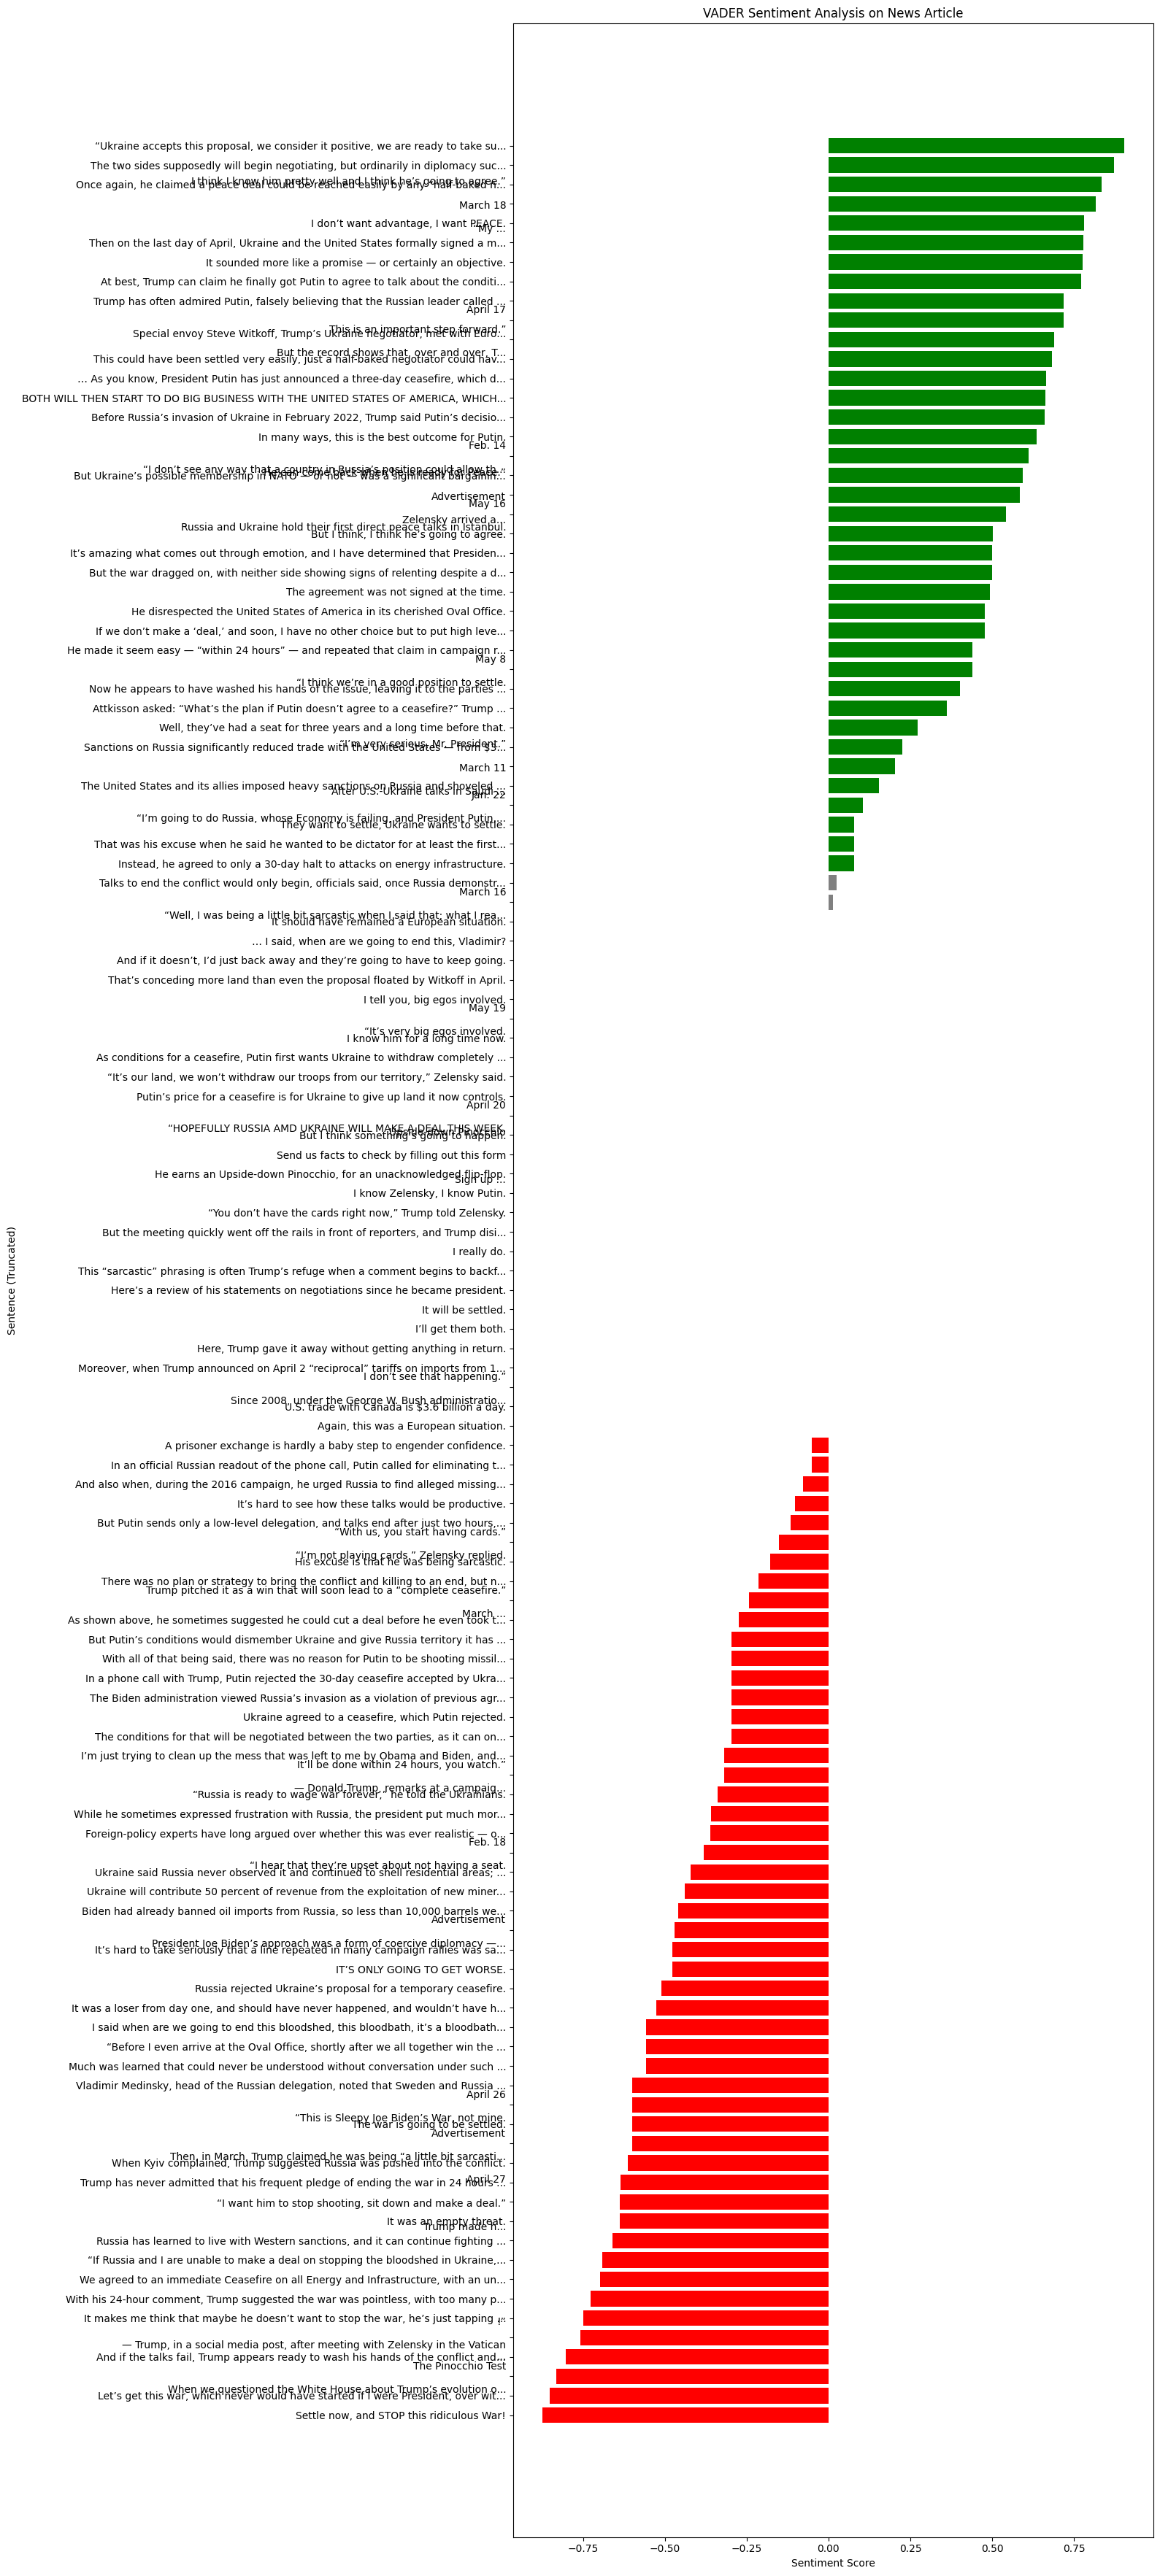

In [ ]:
#VADER
# Install dependencies
!pip install newspaper3k
# Imports
from newspaper import Article
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('vader_lexicon')
# Load article
url = "https://www.washingtonpost.com/politics/2025/05/22/trump-russia-ukraine-24-hours-fact-checker/?utm_source=chatgpt.com"
article = Article(url)
article.download()
article.parse()
text = article.text
# Split article into sentences
sentences = sent_tokenize(text)
# Run VADER analysis
sia = SentimentIntensityAnalyzer()
results = []
for sentence in sentences:
    score = sia.polarity_scores(sentence)['compound']
    label = "Positive" if score >= 0.05 else "Negative" if score <= -0.05 else "Neutral"
    results.append([sentence, score, label])
# Create and display DataFrame
df = pd.DataFrame(results, columns=['Sentence', 'Sentiment Score', 'Sentiment Category'])
print("\n=== Sentiment Analysis Breakdown ===")
print(df)
# Count how many sentences fall into each category
sentiment_counts = df['Sentiment Category'].value_counts()
print("\n=== Sentiment Category Counts ===")
print(sentiment_counts)
# Prepare bar chart
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
df_sorted = df.sort_values(by='Sentiment Score', ascending=True)
plt.figure(figsize=(16, max(5, len(df_sorted)*0.3)))
plt.barh(
    [s[:80] + "..." if len(s) > 80 else s for s in df_sorted['Sentence']],
    df_sorted['Sentiment Score'],
    color=[colors[label] for label in df_sorted['Sentiment Category']]
)
plt.xlabel('Sentiment Score')
plt.ylabel('Sentence (Truncated)')
plt.title('VADER Sentiment Analysis on News Article')
plt.tight_layout()
plt.show()

結果の説明：

「“It’s ONLY GOING TO GET WORSE.”のような明確な感情を示す言葉と真剣なトーンがある文では、VADERとBERTの両方が正しくその文を分類し、どちらも強くネガティブな感情を示しました。同様に、「Ukraine will contribute 50 percent of revenue...」のような文では、貢献するや収益といったポジティブな言葉が使われているため、ポジティブな感情として分類されます。しかし、異なる結果が見られるのは、あいまいで皮肉的、または中立的なトーンの文です。例えば、「This is the best outcome for Putin.」は、BERTによってポジティブな感情と分類され、VADERによってネガティブな感情と分類されました。

私が選んだ記事の場合、BERTの方が適していると考えます。その理由は、BERTが事前に大規模なデータセットで訓練された機械学習を使用しているため、皮肉やあいまいな文を理解するのに優れているからです。さらに、BERTは暗黙の意味も理解し、また、信頼度を示すため、より確実性があります。

私の観察によると、BERTは文が皮肉や侮辱であるかどうかを理解できます。例えば、「Upside-down Pinocchio」をネガティブな意味として正しく分類しました。高い信頼度の結果は、強い感情が表れている場合にほぼ常に一致しており、これが正しいと考えられます。一方、低い信頼度の結果は、あいまいな発言に見られました。

---

 Explanation of result

When the sentence has obvious emotion-indicating words and serious tone such as “It’s ONLY GOING TO GET WORSE.” both VADER and BERT correctly classified the sentence, in this case both indicating it as strongly negative. Similarly in this sentence “Ukraine will contribute 50 percent of revenue…” positive words such as contribute and possibly revenue are used, resulting in positive sentiment. Disagreements were usually in ambiguous, sarcastic and neutral-tone sentences. For example, “This is the best outcome for Putin.” is classified positive sentiment by BERT and Negative sentiment by VADER.

In the case of article I chose, BERT is more suitable. The reason is that BERT uses machine learning which is trained on large sets of data already beforehand. It’s better at understanding sarcasm and ambiguous sentences. Moreover, it understands the implicit meaning. Also, BERT provides signed confidence, which gives a more certainty.

My observation is that BERT understands if a sentence is sarcasm or insult. For example it correctly classified “Upside-down Pinocchio” as a negative meaning. High confidence results almost always aligned with strong, clear sentiment, which is likely to be correct. While, low-confidence results appeared with ambiguous statements.